In [2]:
# import dependencies
import pandas as pd
from random import sample
from citipy import citipy
import numpy as np
import requests
import scipy.stats as st
from pprint import pprint
from apikey import weatherkey
# import API key from file

In [3]:
# generate a list 500 random coordinate pairs that are well distributed across the coordinate range
longitudes = []
latitudes = []
longitudes = np.array(sample(range(-18000,18001),k=1500))/100
latitudes = np.array(sample(range(-9000,9001),k=1500))/100

In [4]:
coordinates = zip(latitudes,longitudes)
display(coordinates)
display(len(latitudes))
display(len(longitudes))

1500

1500

In [5]:
# import citipy, create a list of cities from the random coordinate pairs
citylist = []

for entry in coordinates:
    cityname = citipy.nearest_city(entry[0],entry[1]).city_name
    if cityname not in citylist:
        citylist.append(cityname)
   # print(citylist)
    #coordinates["Nearest City"] = citipy.nearest_city(coordinates['latitudes'],coordinates['longitudes']).city_name

In [8]:
display(len(citylist))

615

In [11]:
response = requests.get(f"{baseurl}appid={weatherkey}&units=imperial&q=Seattle").json()

In [14]:
pprint(response)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 38.5167, 'lon': -28.7},
 'dt': 1619911670,
 'id': 3372707,
 'main': {'feels_like': 62.98,
          'humidity': 94,
          'pressure': 1015,
          'temp': 62.6,
          'temp_max': 62.6,
          'temp_min': 62.6},
 'name': 'Ribeira Grande',
 'sys': {'country': 'PT',
         'id': 6883,
         'sunrise': 1619852246,
         'sunset': 1619901967,
         'type': 1},
 'timezone': 0,
 'visibility': 9000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'speed': 16.11}}


In [16]:
#set up loop for each city in citylist
    # make an api call to openweathermap's API
baseurl = "https://api.openweathermap.org/data/2.5/weather?"

citynames = []
citylats = []
citylons = []
country = []
timezone = []
citycount = 1
for city in citylist:
    response = requests.get(f"{baseurl}appid={weatherkey}&units=imperial&q={city}").json()
    try:
        citynames.append(response["name"])
        citylats.append(response["coord"]['lat'])
        citylons.append(response["coord"]['lon'])
        country.append(response["sys"]["country"])
        timezone.append(response["timezone"])
        print(f"{citycount} Information for {city} successfully retreived")
        citycount += 1
    except (KeyError, IndexError):
        print(f'FAIL: Unable to retrive information for {city}')
        

FAIL: Unable to retrive information for buon me thuot
1 Information for ushuaia successfully retreived
2 Information for kloulklubed successfully retreived
3 Information for butaritari successfully retreived
4 Information for syedove successfully retreived
5 Information for mahebourg successfully retreived
6 Information for tiksi successfully retreived
7 Information for punta arenas successfully retreived
8 Information for rikitea successfully retreived
9 Information for luderitz successfully retreived
10 Information for yellowknife successfully retreived
11 Information for chunskiy successfully retreived
12 Information for mataura successfully retreived
13 Information for kapaa successfully retreived
FAIL: Unable to retrive information for saleaula
14 Information for bredasdorp successfully retreived
15 Information for khatanga successfully retreived
16 Information for kyren successfully retreived
17 Information for ahipara successfully retreived
18 Information for bambous virieux suc

In [28]:
#display(citynames)
#display(citylats)
#display(citylons)
print(len(citynames))
citydata = pd.DataFrame.from_dict({"City Name":citynames,"Latitude":citylats,"Longitude":citylons,"Country":country,"UTC +/- (hours)":np.array(timezone)/3600})
display(citydata)
citydata.to_csv(r'..\\Data\\City_data.csv')

567


,City Name,Latitude,Longitude,Country,UTC +/- (hours)
0,Ushuaia,-54.8000,-68.3000,AR,-3.0
1,Kloulklubed,7.0419,134.2556,PW,9.0
2,Butaritari,3.0707,172.7902,KI,12.0
3,Syedove,47.0768,38.1560,UA,3.0
4,Mahébourg,-20.4081,57.7000,MU,4.0
...,...,...,...,...,...
562,General Roca,-39.0333,-67.5833,AR,-3.0
563,Redding,40.5865,-122.3917,US,-7.0
564,Kholm,59.2667,32.8500,RU,3.0
565,Penzance,50.1186,-5.5371,GB,1.0


In [30]:
onecall = "https://api.openweathermap.org/data/2.5/onecall?"
citydata["Max Temperature"] = ""
citydata["Humidity"] = ""
citydata["Cloudiness"] = ""
citydata["Wind Speed"] = ""
exclude = "current,minutely,hourly,alerts"
citycounts =1

for index, row in citydata.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    onecallresponse = (requests.get(f"{onecall}lat={lat}&lon={lon}&exclude={exclude}&appid={weatherkey}&units=imperial").json()
                       ['daily'][0])
    try:
        citydata.loc[index, 'Max Temperature'] = onecallresponse['temp']['max']
        citydata.loc[index, 'Humidity'] = onecallresponse['humidity']
        citydata.loc[index, 'Cloudiness'] = onecallresponse['clouds']
        citydata.loc[index, 'Wind Speed'] = onecallresponse['wind_speed']
        print(f'{citycounts} Information successfully retreived for {citydata.loc[index,"City Name"]}')
        citycounts += 1
    except (KeyError, IndexError, SSLEOFError,SSLError):
        print(f'FAIL: Unable to retrieve information for {citydata.loc[index,"City Name"]}')
display(citydata)

1 Information successfully retreived for Ushuaia
2 Information successfully retreived for Kloulklubed
3 Information successfully retreived for Butaritari
4 Information successfully retreived for Syedove
5 Information successfully retreived for Mahébourg
6 Information successfully retreived for Tiksi
7 Information successfully retreived for Punta Arenas
8 Information successfully retreived for Rikitea
9 Information successfully retreived for Lüderitz
10 Information successfully retreived for Yellowknife
11 Information successfully retreived for Chunskiy
12 Information successfully retreived for Mataura
13 Information successfully retreived for Kapaa
14 Information successfully retreived for Bredasdorp
15 Information successfully retreived for Khatanga
16 Information successfully retreived for Kyren
17 Information successfully retreived for Ahipara
18 Information successfully retreived for Bambous Virieux
19 Information successfully retreived for Ribeira Grande
20 Information successfull

,City Name,Latitude,Longitude,Country,UTC +/- (hours),Max Temperature,Humidity,Cloudiness,Wind Speed
0,Ushuaia,-54.8000,-68.3000,AR,-3.0,42.13,84,92,3.33
1,Kloulklubed,7.0419,134.2556,PW,9.0,84.13,85,94,21.12
2,Butaritari,3.0707,172.7902,KI,12.0,83.55,74,99,14.9
3,Syedove,47.0768,38.1560,UA,3.0,65.91,73,97,10.16
4,Mahébourg,-20.4081,57.7000,MU,4.0,79.83,78,40,10.29
...,...,...,...,...,...,...,...,...,...
562,General Roca,-39.0333,-67.5833,AR,-3.0,65.61,52,100,19.55
563,Redding,40.5865,-122.3917,US,-7.0,81.77,28,7,6.53
564,Kholm,59.2667,32.8500,RU,3.0,50.34,43,81,5.59
565,Penzance,50.1186,-5.5371,GB,1.0,50.25,60,3,12.95


In [34]:
#Save data to a csv file. This can be used to load data into memory for analysis
citydata.to_csv(r'..\\Data\\forecast_data.csv')

City Name           object
Latitude           float64
Longitude          float64
Country             object
UTC +/- (hours)    float64
Max Temperature     object
Humidity            object
Cloudiness          object
Wind Speed          object
dtype: object

In [35]:
#convert data types for analysis
citydata["Max Temperature"] = pd.to_numeric(citydata["Max Temperature"])
citydata["Humidity"] = pd.to_numeric(citydata["Humidity"])
citydata["Cloudiness"] = pd.to_numeric(citydata["Cloudiness"])
citydata["Wind Speed"] = pd.to_numeric(citydata["Wind Speed"])

In [36]:
display(citydata.describe())
display(citydata.corr())

,Latitude,Longitude,UTC +/- (hours),Max Temperature,Humidity,Cloudiness,Wind Speed
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,21.128170,17.750535,1.980159,69.572240,56.460317,57.324515,12.734656
std,32.841486,90.755938,5.785528,20.068188,21.879402,38.565815,6.060704
min,-54.800000,-179.166700,-11.000000,17.600000,1.000000,0.000000,1.360000
25%,-6.611350,-63.889850,-4.000000,53.100000,40.000000,16.500000,7.990000
50%,25.281900,22.979800,2.000000,72.930000,60.000000,67.000000,11.970000
75%,49.236100,99.984800,7.000000,84.470000,72.500000,97.000000,16.740000
max,78.218600,178.416700,13.000000,109.380000,100.000000,100.000000,36.530000


,Latitude,Longitude,UTC +/- (hours),Max Temperature,Humidity,Cloudiness,Wind Speed
Latitude,1.000000,-0.114619,-0.054830,-0.588729,-0.007900,0.212283,0.148039
Longitude,-0.114619,1.000000,0.940522,0.018256,0.123006,-0.001639,-0.103397
UTC +/- (hours),-0.054830,0.940522,1.000000,-0.067118,0.149877,0.038552,-0.083653
Max Temperature,-0.588729,0.018256,-0.067118,1.000000,-0.440551,-0.261521,-0.041824
Humidity,-0.007900,0.123006,0.149877,-0.440551,1.000000,0.349958,-0.190874
Cloudiness,0.212283,-0.001639,0.038552,-0.261521,0.349958,1.000000,0.075768
Wind Speed,0.148039,-0.103397,-0.083653,-0.041824,-0.190874,0.075768,1.000000


These visualization is exploring the relationship between Max Temperature and latitude for randomly selected cities.
          This data was collected from the OpenWeatherMap API.
These visualization is exploring the relationship between Humidity and latitude for randomly selected cities.
          This data was collected from the OpenWeatherMap API.
These visualization is exploring the relationship between Cloudiness and latitude for randomly selected cities.
          This data was collected from the OpenWeatherMap API.
These visualization is exploring the relationship between Wind Speed and latitude for randomly selected cities.
          This data was collected from the OpenWeatherMap API.


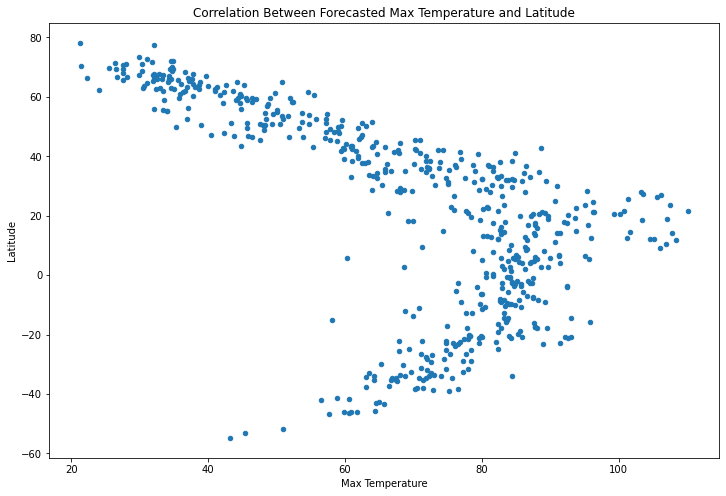

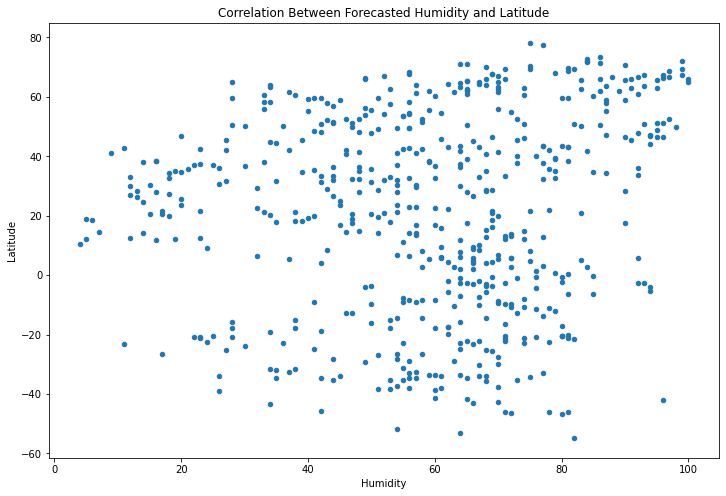

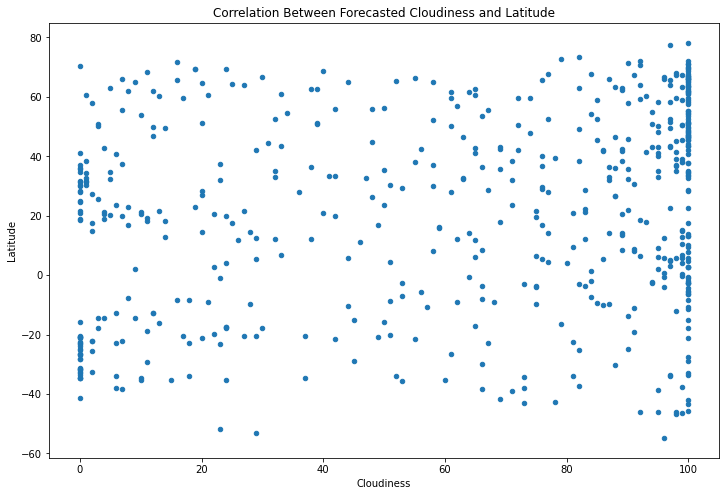

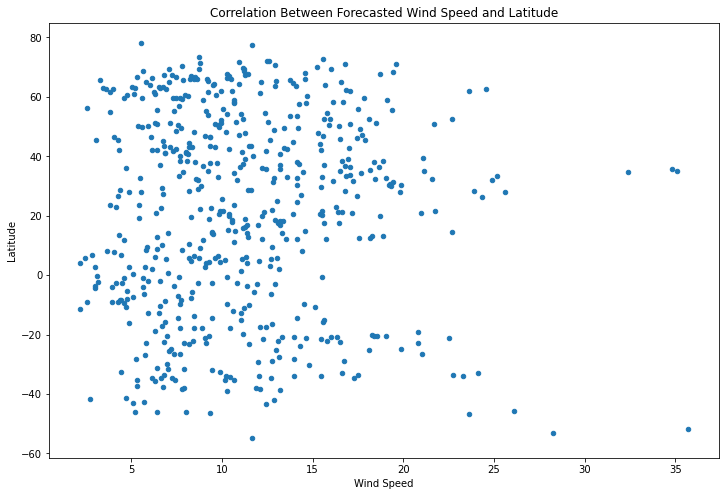

In [137]:
comparelist = ['Max Temperature','Humidity','Cloudiness','Wind Speed']
for element in comparelist:
    citydata.plot.scatter(element,"Latitude", figsize = (12,8),title=f'Correlation Between Forecasted {element} and Latitude')
    print(f'''These visualization is exploring the relationship between {element} and latitude for randomly selected cities.
          This data was collected from the OpenWeatherMap API.''')

#for each variable in list
    #plot scatter plot vs latitude
    #export each plot to a png file
    #if lat >o
        # plot all possible scatter plots vs latitude
        #run linear regression for each plot
        #add regression results to the plot
        #export plot to png file
    #else
        #do the same as above on separate plots
        

In [141]:
southernhemisphere = pd.DataFrame
southernhemisphere =citydata[citydata['Latitude']<0]

northernhemisphere = pd.DataFrame
northernhemisphere = citydata[citydata['Latitude']>0]

These visualization is exploring the relationship between Max Temperature and latitude for randomly selected cities.
          This data was collected from the OpenWeatherMap API.
These visualization is exploring the relationship between Humidity and latitude for randomly selected cities.
          This data was collected from the OpenWeatherMap API.
These visualization is exploring the relationship between Cloudiness and latitude for randomly selected cities.
          This data was collected from the OpenWeatherMap API.
These visualization is exploring the relationship between Wind Speed and latitude for randomly selected cities.
          This data was collected from the OpenWeatherMap API.


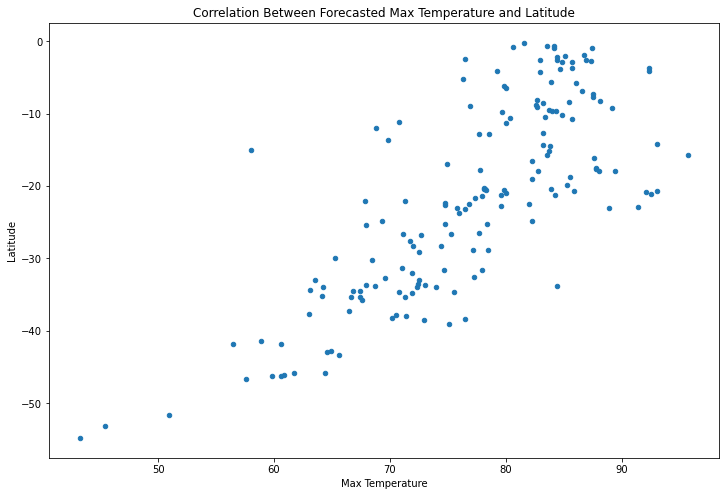

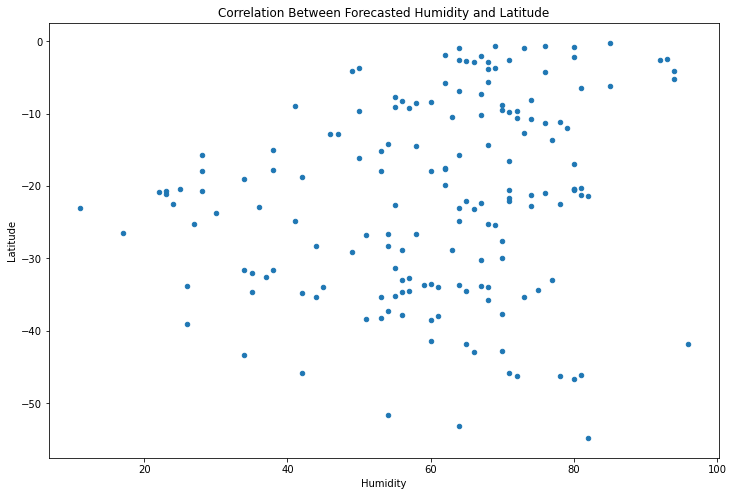

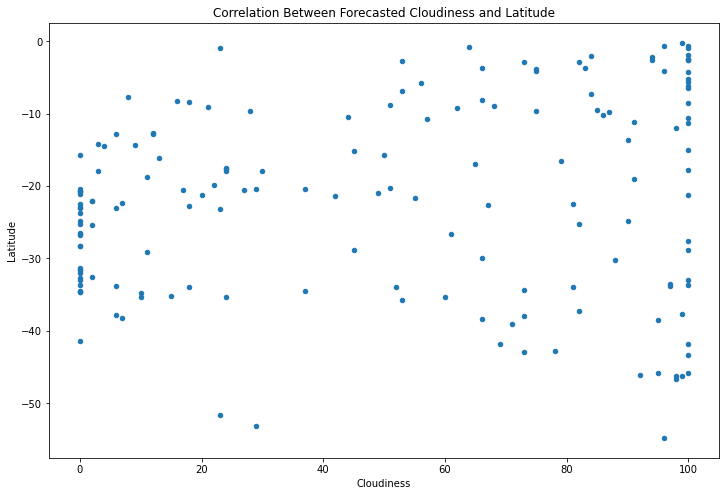

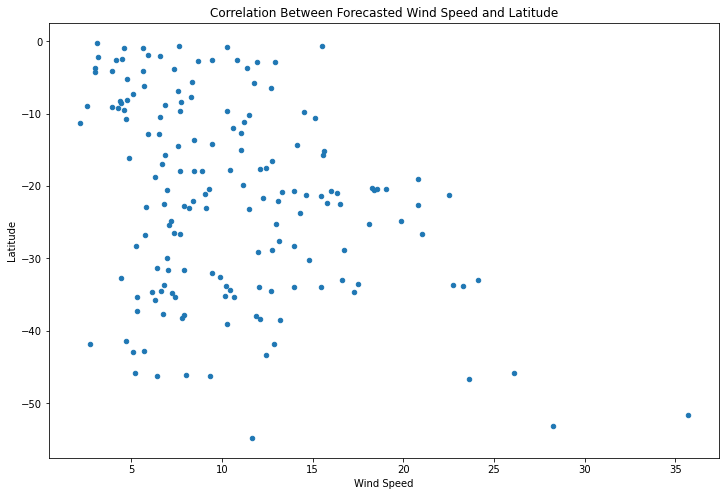

In [142]:
comparelist = ['Max Temperature','Humidity','Cloudiness','Wind Speed']
for element in comparelist:
    southernhemisphere.plot.scatter(element,"Latitude", figsize = (12,8),title=f'Correlation Between Forecasted {element} and Latitude')
    print(f'''These visualization is exploring the relationship between {element} and latitude for randomly selected cities.
          This data was collected from the OpenWeatherMap API.''')

These visualization is exploring the relationship between Max Temperature and latitude for randomly selected cities.
          This data was collected from the OpenWeatherMap API.
These visualization is exploring the relationship between Humidity and latitude for randomly selected cities.
          This data was collected from the OpenWeatherMap API.
These visualization is exploring the relationship between Cloudiness and latitude for randomly selected cities.
          This data was collected from the OpenWeatherMap API.
These visualization is exploring the relationship between Wind Speed and latitude for randomly selected cities.
          This data was collected from the OpenWeatherMap API.


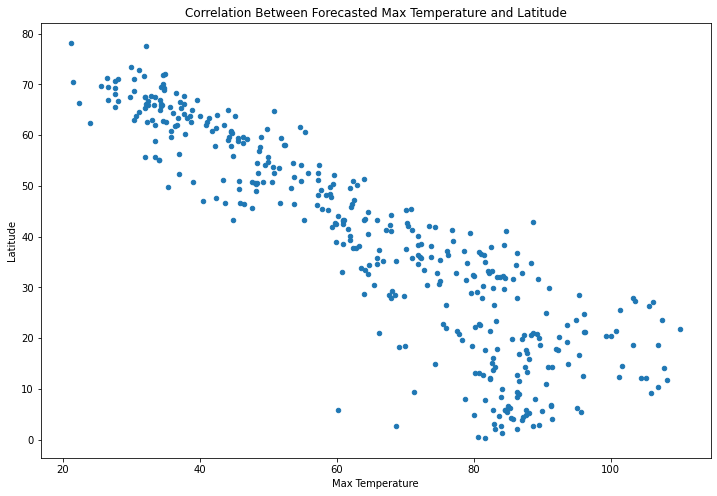

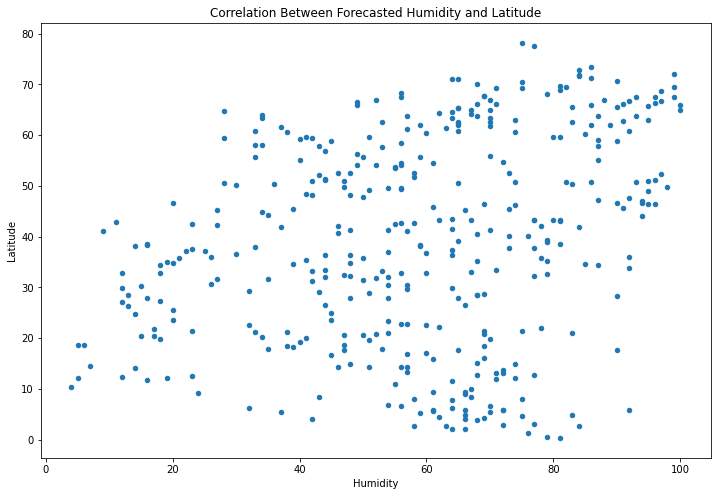

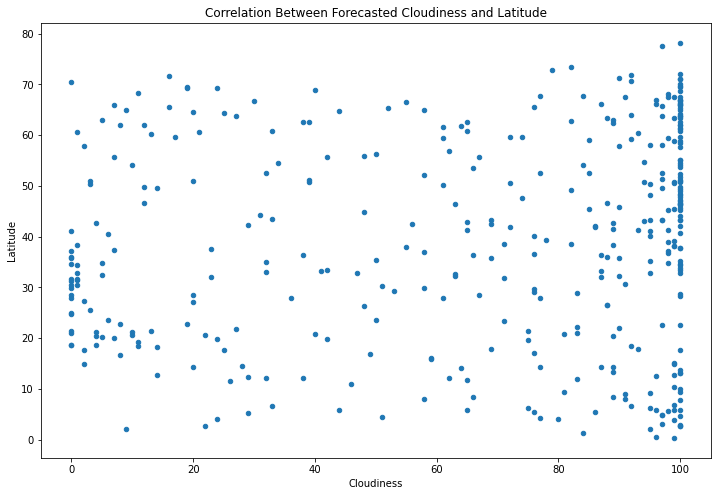

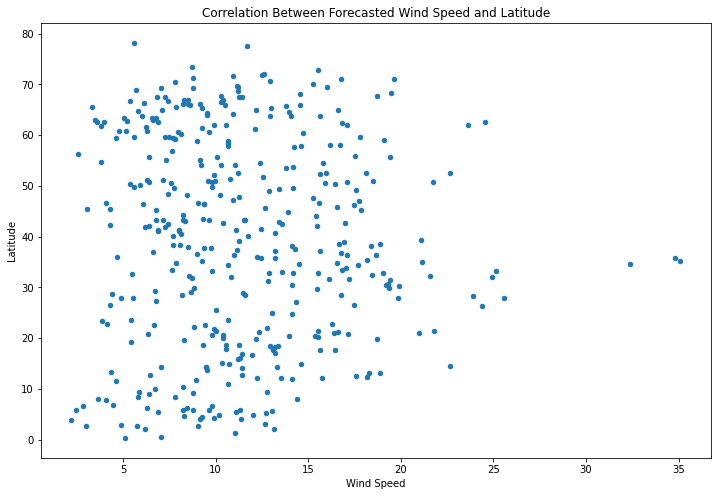

In [143]:
comparelist = ['Max Temperature','Humidity','Cloudiness','Wind Speed']
for element in comparelist:
    northernhemisphere.plot.scatter(element,"Latitude", figsize = (12,8),title=f'Correlation Between Forecasted {element} and Latitude')
    print(f'''These visualization is exploring the relationship between {element} and latitude for randomly selected cities.
          This data was collected from the OpenWeatherMap API.''')